In [106]:
# To add a new cell, type '# %%'
# To add a new markdown cell, type '# %% [markdown]'
# %%
import glob
import pandas as pd
import numpy as np
import re
import plotly_express as px
import datetime
import warnings
import os
import json
import traceback
import streamlit as st
pd.options.display.float_format = "{:,.3f}".format
warnings.filterwarnings('ignore')


# TEAMNAMES value in teamnamedict must match the htdatan teamname!

global teamnamedict
# C:\Users\mg\JupyterLabDir\Rest\Pr Winning\teamnamedict_streamlit.json
with open('teamnamedict_streamlit.json') as f:
    teamnamedict = json.load(f)

# def _max_width_():
#     max_width_str = f"max-width: 1300px;"
#     st.markdown(
#         f"""
#     <style>
#     .reportview-container .main .block-container{{
#         {max_width_str}
#     }}
#     </style>
#     """,
#         unsafe_allow_html=True,
#     )

# _max_width_()
global widthfig
widthfig = 700
heightfig = 600

# get all the gamestatistics from in dropdown specified league and season
# setup the database connection.  There's no need to setup cursors with pandas psql.
tables = list(glob.glob("htdatan/*"))

# take only the 0 part of the every list entry
global saissons
saissons = []

# ENV is BTCPRED
for x in range(0, len(tables)):    # CHANGE THIS - \\ - to - / - FOR DEPLOYMENT!
    saissons.append(tables[x].split("\\")[1].split("_24102021.csv")[0])


cleaned_names_saissons = []
for saisson in saissons:
    saisson = saisson.replace("_", " ")
    saisson = saisson.replace(".csv", "")
    # saison = saison.strip()
    cleaned_names_saissons.append(saisson)

# map league shortcuts to real names:
shortcut_league_dict = {
    "ll": "La-Liga",
    "pl": "Premier-League",
    "sa": "Serie-A",
    "pl": "Premier-League",
    "l1": "League-1",
    "b": "Bundesliga",
}
# list(map(cleaned_names_saissons, shortcut_league_dict) )
cleaned_names_saissons = [e.replace(
    key, val) for e in cleaned_names_saissons for key, val in shortcut_league_dict.items() if key in e]

# sort list by int substring
cleaned_names_saissons = sorted(cleaned_names_saissons, key=lambda x: int(
    x.split(" ")[-1]), reverse=True)



In [107]:
cleaned_names_saissons

['Bundesliga 2223',
 'League-1 2223',
 'Premier-League 2223',
 'Bundesliga 2122',
 'League-1 2122',
 'La-Liga 2122',
 'Premier-League 2122',
 'Serie-A 2122']

In [108]:
global saison
saison = cleaned_names_saissons[7] 
print(saison)

# map names back for reading the correct csv name
def find_key(input_dict, value):
    for key, val in input_dict.items():
        if val == value:
            return key
    return "None"


saison = "{}_{}".format(find_key(shortcut_league_dict, saison.split(" ")[0]),
                        saison.split(" ")[1]
                        )

try:
    df_complete_saison = pd.read_csv(
        "htdatan/"+saison+".csv", index_col=0, encoding='utf-8')
except:
    df_complete_saison = pd.read_csv(
        "htdatan/"+saison+"_24102021.csv", index_col=0, encoding='utf-8')

df_complete_saison = df_complete_saison.replace(teamnamedict)

Serie-A 2122


In [109]:
df_complete_saison

,H_datetime,H_gameinfo,H_Teamnames,H_Goals,H_Ball Possession,H_Goal Attempts,H_Shots on Goal,H_Shots off Goal,H_Blocked Shots,H_Free Kicks,H_Corner Kicks,H_Offsides,H_Goalkeeper Saves,H_Fouls,H_Yellow Cards,H_Red Cards,H_Total Passes,H_Completed Passes,H_Tackles,H_Attacks,H_Dangerous Attacks,A_datetime,A_gameinfo,A_Teamnames,A_Goals,A_Ball Possession,A_Goal Attempts,A_Shots on Goal,A_Shots off Goal,A_Blocked Shots,A_Free Kicks,A_Corner Kicks,A_Offsides,A_Goalkeeper Saves,A_Fouls,A_Yellow Cards,A_Red Cards,A_Total Passes,A_Completed Passes,A_Tackles,A_Attacks,A_Dangerous Attacks,H_cat
0,21.08.2021 09:30,FootballFootballITALY: Serie A - Round 1,Verona,2,44,3,3,0,0,8,3,0,2,6,1.000,NaN,NaN,117,4,36,21,21.08.2021 09:30,FootballFootballITALY: Serie A - Round 1,Sassuolo,2,56,8,4,4,0,4,2,0,1,6,1.000,NaN,NaN,323,4,52,15,cat0
1,21.08.2021 09:30,FootballFootballITALY: Serie A - Round 1,Verona,0,48,9,1,7,1,4,4,0,3,5,2.000,1.000,NaN,139,8,49,30,21.08.2021 09:30,FootballFootballITALY: Serie A - Round 1,Sassuolo,1,52,7,4,2,1,7,2,1,1,6,1.000,0.000,NaN,141,4,25,12,cat1
2,21.08.2021 09:30,FootballFootballITALY: Serie A - Round 1,Inter,2,60,8,5,1,2,5,2,1,5,10,1.000,NaN,NaN,261,9,68,27,21.08.2021 09:30,FootballFootballITALY: Serie A - Round 1,Genoa,0,40,8,5,2,1,9,2,1,3,3,1.000,NaN,NaN,194,9,36,18,cat2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,22.05.2022 21:00,FOOTBALL\r\nITALY: SERIE A - ROUND 38,Venezia,0,48,4,0,3,1,11,2,2,2,4,0.000,NaN,NaN,186,11,38,17,22.05.2022 21:00,FOOTBALL\r\nITALY: SERIE A - ROUND 38,Cagliari,0,52,7,2,3,2,6,3,0,0,11,1.000,NaN,NaN,201,7,74,27,cat207
758,22.05.2022 21:00,FOOTBALL\r\nITALY: SERIE A - ROUND 38,Salernitana,0,56,14,3,6,5,5,4,1,4,5,0.000,NaN,NaN,242,5,73,32,22.05.2022 21:00,FOOTBALL\r\nITALY: SERIE A - ROUND 38,Udinese,1,44,8,5,3,0,6,0,1,3,5,1.000,NaN,NaN,168,8,37,10,cat208
759,22.05.2022 21:00,FOOTBALL\r\nITALY: SERIE A - ROUND 38,Salernitana,0,46,11,7,4,0,8,3,1,3,6,1.000,NaN,NaN,159,8,60,25,22.05.2022 21:00,FOOTBALL\r\nITALY: SERIE A - ROUND 38,Udinese,3,54,11,6,3,2,6,1,1,7,7,0.000,NaN,NaN,192,11,43,27,cat209


In [111]:
dfallteamnamesl = df_complete_saison.H_Teamnames.unique()

# take only the 0 part of the every list entry
teamsoptions = []
for x in range(0, len(dfallteamnamesl)):
    teamsoptions.append(dfallteamnamesl[x])


In [112]:
teamsoptions

['Verona',
 'Inter',
 'Torino',
 'Empoli',
 'Udinese',
 'Bologna',
 'Napoli',
 'Roma',
 'Cagliari',
 'Sampdoria',
 'Lazio',
 'Atalanta',
 'Juventus',
 'Fiorentina',
 'Sassuolo',
 'Genoa',
 'Salernitana',
 'AC Milan',
 'Spezia',
 'Venezia']

In [113]:
global xg_team
xg_team = teamsoptions[0]
xg_team

'Verona'

In [269]:
df_team_agg_playstyle_list = []

for xg_team in teamsoptions:

    # convert string to df to use process_team_names_of_df function
    df_teamname = pd.DataFrame([xg_team])

    # convert xg teamnames to correct ones that are used in htdatan
    team_df = df_teamname.replace(teamnamedict)
    team = team_df.iloc[0][0]

    df = df_complete_saison[(df_complete_saison.H_Teamnames == team) | (
        df_complete_saison.A_Teamnames == team)]

    # return df, team, saison


    def process_team_names_of_df(x_df):
        x_df = x_df.replace(teamnamedict)
        return x_df


    def df_cleaning_converting(df):
        df = df[['H_Teamnames', 'A_Teamnames', 'H_Goals', 'A_Goals', 'H_Ball Possession', 'A_Ball Possession', 'A_Goal Attempts', 'H_Goal Attempts',
                'H_Shots on Goal', 'A_Shots on Goal', 'H_Shots off Goal', 'A_Shots off Goal', 'H_Free Kicks',"H_Red Cards", "A_Red Cards",
                'A_Free Kicks', 'H_Corner Kicks', 'A_Corner Kicks', 'H_Offsides', 'A_Offsides', 'H_Goalkeeper Saves', 'A_Goalkeeper Saves',
                'H_Fouls', 'A_Fouls', 'A_gameinfo', 'A_datetime', 'xG', 'GOALS', 'xPTS', 'A_xG', 'A_GOALS', 'A_xPTS', 'timing_chart_xg', "homexg_complete_game", "awayxg_complete_game"]]
        df = df.drop_duplicates(subset=['H_Teamnames', 'A_Teamnames', 'H_Goals', 'A_Goals', 'H_Ball Possession', 'A_Ball Possession', 'A_Goal Attempts', 'H_Goal Attempts',
                'H_Shots on Goal', 'A_Shots on Goal', 'H_Shots off Goal', 'A_Shots off Goal', 'H_Free Kicks',"H_Red Cards", "A_Red Cards",
                'A_Free Kicks', 'H_Corner Kicks', 'A_Corner Kicks', 'H_Offsides', 'A_Offsides', 'H_Goalkeeper Saves', 'A_Goalkeeper Saves',
                'H_Fouls', 'A_Fouls', 'A_gameinfo', 'A_datetime', 'xG', 'GOALS', 'xPTS', 'A_xG', 'A_GOALS', 'A_xPTS'], keep='first')
        df = df.reset_index(drop=True)
        df["R"] = 'X'

        df['timing_chart_xg'] = df['timing_chart_xg'].astype('str') 

        # calculate halftime xG for both teams!
        df['xg_halftime'] = -1
        df['Axg_halftime'] = -1
        for index, row in df.iterrows():
            print(index)
            try:    
                # away team xg at halfime!
                df['Axg_halftime'].loc[index] = df["timing_chart_xg"].loc[index].split("45' ")[0].split("Total xG: ")[-1].split("\n")[0].replace(";", "")  
                # home team xg at halfime!
                df['xg_halftime'].loc[index] = df["timing_chart_xg"].loc[index].split("45' ")[1].split("Total xG: ")[1].split("\n")[0].replace(";", "") 
            except Exception:
                print("WRONG! index: ", index)
                # print(row)
                # print(traceback.format_exc())

        df.xg_halftime = df.xg_halftime.astype(float).fillna(0.0)
        df.Axg_halftime = df.Axg_halftime.astype(float).fillna(0.0) 




        for i in range(0, len(df)):
            try:

                if df["H_Goals"][i] > df["A_Goals"][i]:
                    df["R"][i] = 'H'
                if df["H_Goals"][i] < df["A_Goals"][i]:
                    df["R"][i] = 'A'
                else:
                    df["R"][i] = 'D'
            except:
                print("error?")
        print("!!!", df.columns)
        df.columns = ['Home', 'Opponent', 'G-H', 'G-A', 'BP-H', 'BP-A', 'GA-H', 'GA-A',
                    'SoG-H', 'SoG-A', 'SoffG-H', 'SoffG-A', 'FK-H',"H_Red Cards", "A_Red Cards",
                    'FK-A', 'C-H', 'C-A', 'Off-H', 'Off-A', 'GoKeSa-H', 'GoKeSa-A',
                    'F-H', 'F-A', 'Round', 'Date', 'xG', 'GOALS', 'xPTS', 'A_xG', 'A_GOALS', 'A_xPTS', "timing_chart_xg", "homexg_complete_game", "awayxg_complete_game", 'R',  'xg_halftime', 'Axg_halftime',]

        df = df[['Home', 'Opponent', 'R', 'G-H', 'G-A', 'BP-H', 'BP-A', 'GA-H', 'GA-A',
                'SoG-H', 'SoG-A', 'SoffG-H', 'SoffG-A', 'FK-H',"H_Red Cards", "A_Red Cards",
                'FK-A', 'C-H', 'C-A', 'Off-H', 'Off-A', 'GoKeSa-H', 'GoKeSa-A', 'F-H',
                'F-A', 'Round', 'Date', 'xG', 'GOALS', 'xPTS', 'A_xG', 'A_GOALS', 'A_xPTS', 'xg_halftime', 'Axg_halftime', "homexg_complete_game", "awayxg_complete_game", ]]

        df["IsHome"] = 0

        df = df[['Home', 'Opponent', 'R', 'G-H', 'G-A', 'BP-H', 'BP-A', 'GA-H', 'GA-A',
                'SoG-H', 'SoG-A', 'SoffG-H', 'SoffG-A', 'FK-H',"H_Red Cards", "A_Red Cards",
                'FK-A', 'C-H', 'C-A', 'Off-H', 'Off-A', 'GoKeSa-H', 'GoKeSa-A', 'F-H',
                'F-A', 'Round', 'Date', 'IsHome', 'xG', 'GOALS', 'xPTS', 'A_xG', 'A_GOALS', 'A_xPTS','xg_halftime', 'Axg_halftime', "homexg_complete_game", "awayxg_complete_game", ]]
        return df


    def df_specific_team(df, team):
        df4Home = df.loc[((df['Home'] == team))]

        df4Home["IsHome"] = 1

        # recalcualte the winner because of the columns switching to bring the selected team in the first column
        df4Home["1x2"] = 0

        df4Home["1x2"] = df4Home.apply(
            lambda row: calculate_1x2_home(row), axis=1, result_type='reduce')

        # Berechnung Opponentgames
        df4Opponent = df.loc[((df['Opponent'] == team))]


        

        # recalcualte the winner because of the columns switching to bring the selected team in the first column
        df4Opponent["1x2"] = 0

        df4Opponent["1x2"] = df4Opponent.apply(
            lambda row: calculate_1x2_Opponent(row), axis=1, result_type='reduce')

        # change the halftime-xg with halftime-Axg:
        # switched the two columns
        # Change the columns for the Opponentmatches of the specific team
        print("df4Opponent.columns before reassignment oppo", df4Opponent.columns)

        OpponentTeamReversedColumns = ['Opponent', 'Home',  '1x2', 'R',  'G-A', 'G-H', 'BP-A', 'BP-H', 'GA-A', 'GA-H',  
                                        'SoG-A', 'SoG-H', 'SoffG-A', 'SoffG-H',  'FK-A',  "A_Red Cards", "H_Red Cards",
                                        'FK-H','C-A', 'C-H',  'Off-A', 'Off-H', 'GoKeSa-A', 'GoKeSa-H', 'F-A', 
                                        'F-H', 'Round', 'Date', 'IsHome','A_xG', "A_xPTS", "A_GOALS", 'xG', "xPTS", "GOALS", 'Axg_halftime', 'xg_halftime',"awayxg_complete_game", "homexg_complete_game",   ]  # , 'IsHome'
        # Change the columns for the Opponentmatches of the specific team

        df4OpponentReversed = df4Opponent.reindex(
            columns=OpponentTeamReversedColumns)

        df4OpponentReversed.columns = ['Home', 'Opponent', '1x2', 'R', 'G-H', 'G-A', 'BP-H', 'BP-A', 'GA-H', 'GA-A',
                                    'SoG-H', 'SoG-A', 'SoffG-H', 'SoffG-A', 'FK-H', "H_Red Cards", "A_Red Cards",
                                    'FK-A', 'C-H', 'C-A', 'Off-H', 'Off-A', 'GoKeSa-H', 'GoKeSa-A', 'F-H',
                                    'F-A', 'Round', 'Date', 'IsHome', 'xG', "xPTS", "GOALS", 'A_xG', "A_xPTS", "A_GOALS", 'xg_halftime', 'Axg_halftime', "homexg_complete_game", "awayxg_complete_game", ]

        print("df4OpponentReversed.columns after reassignment oppo", df4OpponentReversed.columns)

        return df4Home, df4OpponentReversed

    def create_df4Complete(df4Home, df4OpponentReversed):
        # Alle Spiele werden als Heimspiel angezeigt, sind aber auch Auswärtsspiele dabei!
        df4Complete = pd.concat([df4Home, df4OpponentReversed], sort=False)

        df4Complete["G-H"] = df4Complete["G-H"].astype('float64')
        df4Complete["G-A"] = df4Complete["G-A"].astype('float64')
        df4Complete["BP-H"] = df4Complete["BP-H"].astype('float64')
        df4Complete["BP-A"] = df4Complete["BP-A"].astype('float64')

        # GoalDifference
        df4Complete["GoalDiff"] = df4Complete["G-H"] - df4Complete["G-A"]
        df4Complete = df4Complete.sort_values("Date",  ascending=False)

        # calculate column with 3 Ballposition types
        df4Complete["BPTypes"] = '0'

        df4Complete["BPTypes"] = df4Complete.apply(
            lambda row: calculate_1x2_BPTypes(row), axis=1, result_type='reduce')

        df4Complete['Date'] = pd.to_datetime(
            df4Complete['Date'], format="%d.%m.%Y %H:%M")

        # convert datetime to timestamp for scatter visualization
        df4Complete['timestamp'] = df4Complete.Date.astype('int64')//10**9

        df4Complete = df4Complete.sort_values("Date", ascending=False)

        # Create data for scatter graph
        df4Complete["SoG-H"] = df4Complete["SoG-H"].astype(int)
        df4Complete["SoG-A"] = df4Complete["SoG-A"].astype(int)

        return df4Complete


    def calculate_1x2_home(row):
        if row['G-H'] > row['G-A']:
            return 'W'
        elif row['G-A'] > row['G-H']:
            return 'L'
        else:
            return 'D'


    def calculate_1x2_Opponent(row):
        if row['G-A'] > row['G-H']:
            return 'W'
        elif row['G-H'] > row['G-A']:
            return 'L'
        else:
            return 'D'


    def calculate_1x2_BPTypes(row):
        if row['BP-H'] > 55:
            return '>55'
        elif row['BP-H'] < 45:
            return '<45'
        else:
            return '45-55'


    def calc_stats(df4Complete):
        BP_WPerc = df4Complete[['BPTypes', '1x2']
                            ].loc[df4Complete['BPTypes'] == '>55']
        BP_WAbs = BP_WPerc['1x2'].loc[df4Complete['1x2'] == 'W']
        BP_NWAbs = BP_WPerc['1x2'].loc[df4Complete['1x2'] != 'W']
        if len(BP_WAbs) + len(BP_NWAbs) > 0:
            BP_WPercText = len(BP_WAbs) / (len(BP_WAbs) + len(BP_NWAbs)) * 100
            BP_WPercText = round(BP_WPercText)
        else:
            BP_WPercText = 0

        # calculate winning % for 0.45 - 0.55
        N_WPerc = df4Complete[['BPTypes', '1x2']
                            ].loc[df4Complete['BPTypes'] == '45-55']
        N_WAbs = N_WPerc['1x2'].loc[df4Complete['1x2'] == 'W']
        N_NWAbs = N_WPerc['1x2'].loc[df4Complete['1x2'] != 'W']
        if len(N_WAbs) + len(N_NWAbs) > 0:
            N_WPercText = len(N_WAbs) / (len(N_WAbs) + len(N_NWAbs)) * 100
            N_WPercText = round(N_WPercText)
        else:
            N_WPercText = 5

        # calculate winning % for < 0.45
        C_WPerc = df4Complete[['BPTypes', '1x2']
                            ].loc[df4Complete['BPTypes'] == '<45']
        C_WAbs = C_WPerc['1x2'].loc[df4Complete['1x2'] == 'W']
        C_NWAbs = C_WPerc['1x2'].loc[df4Complete['1x2'] != 'W']
        if len(C_WAbs) + len(C_NWAbs) > 0:
            C_WPercText = len(C_WAbs) / (len(C_WAbs) + len(C_NWAbs)) * 100
            C_WPercText = round(C_WPercText)
        else:
            C_WPercText = 0

        return C_WPercText, N_WPercText, BP_WPercText


    # get name of the selected team in dropdown
    def load_xg_gamestats_sql(saison, team):

        if saison.split("_")[0] == 'b':
            xgprefix = 'bundesliga'
        elif saison.split("_")[0] == 'l1':
            xgprefix = 'ligue_1'
        elif saison.split("_")[0] == 'll':
            xgprefix = 'la_liga'
        elif saison.split("_")[0] == 'pl':
            xgprefix = 'epl'
        elif saison.split("_")[0] == 'sa':
            xgprefix = 'serie_a'

        xgtablename = "{}20{}".format(xgprefix, saison.split("_")[1][:2])

        df_complete_saison = pd.read_csv(
            "xg/"+xgtablename+".csv", index_col=0, encoding='utf-8')

        df_complete_saison = process_team_names_of_df(df_complete_saison)

        # execute the query and assign it to a pandas dataframe
        dfxg = df_complete_saison[(df_complete_saison.TEAMS == team) | (
            df_complete_saison.A_TEAMS == team)]

        return dfxg



    df = process_team_names_of_df(df)

    dfxg = load_xg_gamestats_sql(saison, team)

    # rename columns for
    dfxg_rename = dfxg.rename(
        columns={'TEAMS': 'H_Teamnames', 'A_TEAMS': 'A_Teamnames'})
    # del dfxg

    dfxg_df_merged = pd.merge(
        df, dfxg_rename, on=["H_Teamnames", "A_Teamnames"])
    dfxg_df_merged = dfxg_df_merged.drop_duplicates()

    # %%
    df = dfxg_df_merged

    df["homexg_complete_game"] = ""
    df["awayxg_complete_game"] = ""
    df["last_game_minute"] = -1
    df["start_min_game"] = -1
    df.columns
    game_loc =0
    df["timing_chart_xg"].loc[game_loc]
    df[["A_Teamnames"]].loc[game_loc]
    # for game_loc in df.index[:1]:
    homexg_complete_game = []
    awayxg_complete_game = []

    last_game_minute = df["timing_chart_xg"].loc[game_loc].rsplit("'")[-2].rsplit(";")[1]
    start_min_game = int( re.sub("[^0-9]", "", df["timing_chart_xg"].loc[game_loc][:2]) )

    for x in range(start_min_game,int(last_game_minute)+1):
        try:
            homexgperminute = df["timing_chart_xg"].loc[game_loc].split("{}' Total xG: ".format(x))[1].split(";")[0][:4]  # [:4] - only last 4 digits so no goalscorer infos
            awayxgperminute = df["timing_chart_xg"].loc[game_loc].split("{}' Total xG: ".format(x), 2)[2].split(";")[0][:4]
        except:
            # falls die minute fehlt nehmen wir einfach den xg wert von der vorherigen minute!
            print("min {} is missing in xg".format(x))

        homexg_complete_game.append(homexgperminute)
        awayxg_complete_game.append(awayxgperminute)
        
    df["homexg_complete_game"].loc[game_loc] = homexg_complete_game
    df["awayxg_complete_game"].loc[game_loc] = awayxg_complete_game
    df["last_game_minute"].loc[game_loc] = last_game_minute
    df["start_min_game"].loc[game_loc] = start_min_game

    print("len(df)", len(df))
    for game_loc in df.index:
        
        homexg_complete_game = []
        awayxg_complete_game = []

        try: 
            last_game_minute = df["timing_chart_xg"].loc[game_loc].rsplit("'")[-2].rsplit(";")[1]
        except:
            last_game_minute = 90


        start_min_game = int( re.sub("[^0-9]", "", df["timing_chart_xg"].loc[game_loc][:2]) )
        print(df.H_Teamnames.loc[game_loc])
        print(start_min_game,last_game_minute)
        print(game_loc)
        # nehmen hier minute für minute und schauen nach dem xg wert für diese minute
        for x in range(start_min_game,int(last_game_minute)+1):
            try:
                homexgperminute = df["timing_chart_xg"].loc[game_loc].split("{}' Total xG: ".format(x))[1].split(";")[0][:4]  # [:4] - only last 4 digits so no goalscorer infos
                awayxgperminute = df["timing_chart_xg"].loc[game_loc].split("{}' Total xG: ".format(x), 2)[2].split(";")[0][:4]
            except:
                print("min {} is missing in xg".format(x))
                # homexgperminute = 

            homexg_complete_game.append(homexgperminute)
            awayxg_complete_game.append(awayxgperminute)
            
        df["homexg_complete_game"].loc[game_loc] = homexg_complete_game
        df["awayxg_complete_game"].loc[game_loc] = awayxg_complete_game
        df["last_game_minute"].loc[game_loc] = last_game_minute
        df["start_min_game"].loc[game_loc] = start_min_game


    for x in range(len(df)):
        df.homexg_complete_game.iloc[x][0:0] = [None] * df.start_min_game.iloc[x]
        df.awayxg_complete_game.iloc[x][0:0] = [None] * df.start_min_game.iloc[x]


    df_homexg_complete_game = pd.DataFrame(df.homexg_complete_game.tolist(), index= df.index)
    df_awayxg_complete_game = pd.DataFrame(df.awayxg_complete_game.tolist(), index= df.index)

    df_homexg_complete_game = df_homexg_complete_game.apply(pd.to_numeric)
    df_awayxg_complete_game = df_awayxg_complete_game.apply(pd.to_numeric)

    dfxg_df_merged_cleaned = df_cleaning_converting(df)

    df4Home, df4OpponentReversed = df_specific_team(
        dfxg_df_merged_cleaned, team)

    df4Complete = create_df4Complete(df4Home, df4OpponentReversed)

    slidertext = 'Show last x halftimes'
    nrGames = st.sidebar.slider(slidertext, max_value=len(
        df4Complete), value=len(df4Complete), step=2)

    # change rows of df depending on userinput
    df4Complete = df4Complete[:nrGames]
    df4Complete = df4Complete.sort_values("Date", ascending=False)
    df4Complete = df4Complete.round(1)

    df4Complete.head(10
    )

    df4Complete[['xG', 'A_xG', 'G-H', 'G-A', 'BP-H', 'BP-A', 'GA-H', 'GA-A', 'SoG-H', 'SoG-A',  'xPTS', 'A_xPTS',  "A_Red Cards", "H_Red Cards"]] = df4Complete[['xG',
                                                                                                                                'A_xG', 'G-H', 'G-A', 'BP-H', 'BP-A', 'GA-H', 'GA-A', 'SoG-H', 'SoG-A',  'xPTS', 'A_xPTS',  "A_Red Cards", "H_Red Cards"]].apply(pd.to_numeric, errors='coerce', axis=1)

    df4Complete['A_Red Cards'] = df4Complete['A_Red Cards'].fillna(0)
    df4Complete['H_Red Cards'] = df4Complete['H_Red Cards'].fillna(0)

    df4Complete_show = df4Complete[['Home', 'Opponent', 'IsHome', 'R', 'xG', 'A_xG', 'G-H', 'G-A', 'BP-H', 'BP-A', 'GA-H', 'GA-A',
                                    'SoG-H', 'SoG-A',  'xPTS', 'A_xPTS', 'Date', 'xg_halftime', 'Axg_halftime', "A_Red Cards", "H_Red Cards"]]

    # calc the xg per minute over all games to get the mean over all minutes from all games!

    values = st.sidebar.slider(
        'BP-Range for xG per minute',
        0.0, 100.0, (0.0, 100.0))

    smaller_bp = values[1]
    bigger_bp = values[0]
    dfxg_homexg_complete_game = pd.DataFrame(df4Complete[(df4Complete["BP-H"]>bigger_bp) & (df4Complete["BP-H"]<smaller_bp)].homexg_complete_game.tolist(), index= df4Complete[(df4Complete["BP-H"]>bigger_bp) & (df4Complete["BP-H"]<smaller_bp)].index)
    dfxg_awayxg_complete_game = pd.DataFrame(df4Complete[(df4Complete["BP-H"]>bigger_bp) & (df4Complete["BP-H"]<smaller_bp)].awayxg_complete_game.tolist(), index= df4Complete[(df4Complete["BP-H"]>bigger_bp) & (df4Complete["BP-H"]<smaller_bp)].index)
    dfxg_homexg_complete_game = dfxg_homexg_complete_game.apply(pd.to_numeric)
    dfxg_awayxg_complete_game = dfxg_awayxg_complete_game.apply(pd.to_numeric)
    dfxg_homexg_complete_game = dfxg_homexg_complete_game.fillna(0)
    dfxg_awayxg_complete_game = dfxg_awayxg_complete_game.fillna(0)
    dfxg_homexg_complete_game = dfxg_homexg_complete_game.diff(axis=1)
    dfxg_awayxg_complete_game = dfxg_awayxg_complete_game.diff(axis=1)
    dfxg_homexg_complete_game.mean().min()
    dfxg_homexg_complete_game_all_bps = pd.DataFrame(df4Complete.homexg_complete_game.tolist(), index= df4Complete.index)
    dfxg_awayxg_complete_game_all_bps = pd.DataFrame(df4Complete.awayxg_complete_game.tolist(), index= df4Complete.index)
    dfxg_homexg_complete_game_all_bps = dfxg_homexg_complete_game_all_bps.apply(pd.to_numeric)
    dfxg_awayxg_complete_game_all_bps = dfxg_awayxg_complete_game_all_bps.apply(pd.to_numeric)
    dfxg_homexg_complete_game_all_bps = dfxg_homexg_complete_game_all_bps.fillna(0)
    dfxg_awayxg_complete_game_all_bps = dfxg_awayxg_complete_game_all_bps.fillna(0)
    dfxg_homexg_complete_game_all_bps = dfxg_homexg_complete_game_all_bps.diff(axis=1)
    dfxg_awayxg_complete_game_all_bps = dfxg_awayxg_complete_game_all_bps.diff(axis=1)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', 6)
    # delete games where there is no two halftimes!
    df4Complete = df4Complete[df4Complete.groupby(
        'Opponent')['Opponent'].transform('size') >= 2]
    df4Complete = df4Complete.sort_index()
    # second half is second entry always!
    df4Complete["halftime"] = "0"
    df4Complete['halftime'] = np.where(df4Complete.index % 2, '1', '2')


    naming1x2 = {"W": "Win", "D": "Draw", "L": "Loss"}
    df4Complete['Halftime result'] = df4Complete['1x2'].replace(
        naming1x2)
    df4CompleteGraph = df4Complete.copy()

    print(df4CompleteGraph.columns)
    print(df4CompleteGraph[["xG","A_xG", "xg_halftime", "Axg_halftime","halftime","Opponent",'Halftime result',"timestamp"]])

    df4CompleteGraph.xg_halftime = df4CompleteGraph.xg_halftime.astype(float).fillna(0.0)
    df4CompleteGraph.Axg_halftime = df4CompleteGraph.Axg_halftime.astype(float).fillna(0.0) 

    # all xg values for both halftimes!
    df4CompleteGraph["xG-A_xG"] = df4CompleteGraph["xG"] - df4CompleteGraph["A_xG"]
    df4CompleteGraph["A_xG-xG"] = df4CompleteGraph["A_xG"] - df4CompleteGraph["xG"]
    # all values for first half
    df4CompleteGraph["xg_halftime-Axg_halftime"] = df4CompleteGraph["xg_halftime"] - df4CompleteGraph["Axg_halftime"]
    df4CompleteGraph["Axg_halftime-xg_halftime"] = df4CompleteGraph["Axg_halftime"] - df4CompleteGraph["xg_halftime"]
    # all values for second half
    df4CompleteGraph["xg_halftime2-Axg_halftime2"] = df4CompleteGraph["xG-A_xG"] - df4CompleteGraph["xg_halftime-Axg_halftime"]
    df4CompleteGraph["Axg_halftime2-xg_halftime2"] = df4CompleteGraph["xg_halftime-Axg_halftime"] - df4CompleteGraph["xG-A_xG"]
    df_analyse_all_teams = df4CompleteGraph[['Home', 'Opponent', 'R', 'G-H', 'G-A', 'BP-H', 'BP-A', 'GA-H', 'GA-A',
        'SoG-H', 'SoG-A', 'SoffG-H', 'SoffG-A', 'FK-H', 'H_Red Cards',
        'A_Red Cards', 'FK-A', 'C-H', 'C-A', 'Off-H', 'Off-A', 'GoKeSa-H',
        'GoKeSa-A', 'F-H', 'F-A',
        'GoalDiff',
        'BPTypes', 'halftime', 'Halftime result', 'xg_halftime-Axg_halftime',
        'xg_halftime2-Axg_halftime2' ]].copy()
    df_analyse_all_teams["halftime_xg-Axg"] = np.where(df_analyse_all_teams['halftime'] == '1', df_analyse_all_teams['xg_halftime-Axg_halftime'], df_analyse_all_teams['xg_halftime2-Axg_halftime2'])
    df_analyse_all_teams = df_analyse_all_teams[['Home', 'Opponent', 'R', 'G-H', 'G-A', 'BP-H', 'BP-A', 'GA-H', 'GA-A',
        'SoG-H', 'SoG-A', 'SoffG-H', 'SoffG-A', 'FK-H', 'H_Red Cards',
        'A_Red Cards', 'FK-A', 'C-H', 'C-A', 'Off-H', 'Off-A', 'GoKeSa-H',
        'GoKeSa-A', 'F-H', 'F-A',
        'GoalDiff',
        'BPTypes', 'halftime', 'Halftime result', 'halftime_xg-Axg' ]]
    df_analyse_all_teams
    # how often team plays which bp style?
    value = df_analyse_all_teams["BPTypes"].value_counts()["45-55"]
    df_team_agg_playstyle = pd.DataFrame([value], columns=["count_45-55"])
    
    try: 
        df_team_agg_playstyle["count_<45"] = df_analyse_all_teams["BPTypes"].value_counts()["<45"]
    except:
        df_team_agg_playstyle["count_<45"] = 0

    try: 
        df_team_agg_playstyle["count_>55"] = df_analyse_all_teams["BPTypes"].value_counts()[">55"]
    except:
        df_team_agg_playstyle["count_>55"] = 0

    try: 
        df_team_agg_playstyle["Wins_45-55"] = df_analyse_all_teams[df_analyse_all_teams["BPTypes"]=="45-55"]["Halftime result"].value_counts()["Win"]
    except:
        df_team_agg_playstyle["Wins_45-55"] = 0

    try: 
        df_team_agg_playstyle["Wins_<45"] = df_analyse_all_teams[df_analyse_all_teams["BPTypes"]=="<45"]["Halftime result"].value_counts()["Win"]
    except:
        df_team_agg_playstyle["Wins_<45"] = 0

    try: 
        df_team_agg_playstyle["Wins_>55"] = df_analyse_all_teams[df_analyse_all_teams["BPTypes"]==">55"]["Halftime result"].value_counts()["Win"]
    except:
        df_team_agg_playstyle["Wins_>55"] = 0
    
    try: 
        df_team_agg_playstyle["45-55_halftime_xg"] = df_analyse_all_teams[ (df_analyse_all_teams["BPTypes"]=="45-55")]["halftime_xg-Axg"].median()
    except:
        df_team_agg_playstyle["45-55_halftime_xg"] = 0
        
    try: 
        df_team_agg_playstyle[">55_halftime_xg"] = df_analyse_all_teams[ (df_analyse_all_teams["BPTypes"]==">55")]["halftime_xg-Axg"].median()
    except:
        df_team_agg_playstyle[">55_halftime_xg"] = 0
    
    try: 
        df_team_agg_playstyle["<45_halftime_xg"] = df_analyse_all_teams[ (df_analyse_all_teams["BPTypes"]=="<45")]["halftime_xg-Axg"].median()
    except:
        df_team_agg_playstyle["<45_halftime_xg"] = 0
    
    
    df_team_agg_playstyle["Team"] = df_analyse_all_teams["Home"][0]

    df_team_agg_playstyle_list.append(df_team_agg_playstyle)
    



len(df) 76
Verona
0 90
0
Verona
0 90
1
Verona
0 93
2
Verona
0 93
3
Bologna
0 92
4
Bologna
0 92
5
Verona
0 92
6
Verona
0 92
7
Salernitana
0 90
8
Salernitana
0 90
9
Genoa
0 95
10
Genoa
0 95
11
Verona
0 90
12
Verona
0 90
13
AC Milan
0 92
14
AC Milan
0 92
15
Verona
0 91
16
Verona
0 91
17
Udinese
0 94
18
Udinese
0 94
19
Verona
0 90
20
Verona
0 90
21
Napoli
0 91
22
Napoli
0 91
23
Verona
0 91
24
Verona
0 91
25
Sampdoria
0 90
26
Sampdoria
0 90
27
Verona
0 91
28
Verona
0 91
29
Venezia
0 90
30
Venezia
0 90
31
Verona
0 90
32
Verona
0 90
33
Torino
0 94
34
Torino
0 94
35
Verona
0 94
36
Verona
0 94
37
Spezia
0 93
38
Spezia
0 93
39
Verona
0 93
40
Verona
0 93
41
Sassuolo
0 93
42
Sassuolo
0 93
43
Verona
0 94
44
Verona
0 94
45
Juventus
0 90
46
Juventus
0 90
47
Verona
0 91
48
Verona
0 91
49
Fiorentina
0 91
50
Fiorentina
0 91
51
Verona
0 91
52
Verona
0 91
53
Roma
0 90
54
Roma
0 90
55
Verona
0 91
56
Verona
0 91
57
Empoli
0 90
58
Empoli
0 90
59
Verona
0 90
60
Verona
0 90
61
Inter
0 90
62
Inter
0 90
63
Atala

In [ ]:
df_team_agg_playstyle_all = pd.concat(df_team_agg_playstyle_list)
df_team_agg_playstyle_all = df_team_agg_playstyle_all.fillna(0)

In [ ]:
df_team_agg_playstyle_all.columns

Index(['count_45-55', 'count_<45', 'count_>55', 'Wins_45-55', 'Wins_<45',
       'Wins_>55', 'Wins_45-55_halftime_xg', 'Wins_>55_halftime_xg',
       'Wins_<45_halftime_xg', 'Team'],
      dtype='object')

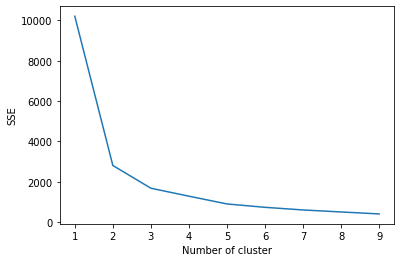

In [ ]:
#Elbow-Method um das beste "K" zu finden 

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = df_team_agg_playstyle_all[['count_45-55', 'count_<45', 'count_>55', 'Wins_45-55', 'Wins_<45',
       'Wins_>55', '45-55_halftime_xg', '>55_halftime_xg',
       '<45_halftime_xg']]

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [ ]:
#KMeans Algorithmus via sklearn einbinden und ausführen
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, init='k-means++', n_init=10)
km.fit(data)

KMeans(n_clusters=3)

In [ ]:
labels = km.predict(data)
x = km.fit_predict(data)
x

array([0, 2, 0, 1, 1, 0, 2, 0, 1, 1, 2, 0, 0, 2, 0, 1, 1, 2, 1, 1])

In [ ]:
df_team_agg_playstyle_all["Cluster"] = x
df_team_agg_playstyle_all

,count_45-55,count_<45,count_>55,Wins_45-55,Wins_<45,Wins_>55,Wins_45-55_halftime_xg,Wins_>55_halftime_xg,Wins_<45_halftime_xg,Team,Cluster
0,31,23,22,14,7,6,0.300,0.500,0.500,Verona,0
0,22,11,43,8,5,29,0.750,1.200,0.700,Inter,2
0,30,15,31,9,1,11,0.600,0.900,1.300,Torino,0
...,...,...,...,...,...,...,...,...,...,...,...
0,28,12,36,13,5,19,1.000,0.700,0.600,AC Milan,2
0,20,47,9,2,9,3,0.700,-0.100,0.100,Spezia,1
0,25,44,7,2,9,2,0.300,0.300,0.400,Venezia,1


In [ ]:
df_team_agg_playstyle_all[df_team_agg_playstyle_all["Cluster"] == 0]

,count_45-55,count_<45,count_>55,Wins_45-55,Wins_<45,Wins_>55,Wins_45-55_halftime_xg,Wins_>55_halftime_xg,Wins_<45_halftime_xg,Team,Cluster
0,31,23,22,14,7,6,0.300,0.500,0.500,Verona,0
0,30,15,31,9,1,11,0.600,0.900,1.300,Torino,0
0,25,23,28,6,7,2,0.850,0.250,0.200,Bologna,0
...,...,...,...,...,...,...,...,...,...,...,...
0,29,11,36,14,1,12,0.850,0.750,-0.500,Atalanta,0
0,35,15,26,13,8,16,0.400,0.700,0.450,Juventus,0
0,32,10,34,13,5,9,0.300,0.500,-0.100,Sassuolo,0


In [ ]:
df_team_agg_playstyle_all[df_team_agg_playstyle_all["Cluster"] == 1]

,count_45-55,count_<45,count_>55,Wins_45-55,Wins_<45,Wins_>55,Wins_45-55_halftime_xg,Wins_>55_halftime_xg,Wins_<45_halftime_xg,Team,Cluster
0,29,32,15,11,6,3,0.300,0.300,-0.450,Empoli,1
0,25,46,5,10,18,0,0.600,0.000,0.350,Udinese,1
0,21,42,13,4,6,4,0.450,0.650,-0.150,Cagliari,1
...,...,...,...,...,...,...,...,...,...,...,...
0,20,46,10,2,8,5,0.100,0.800,0.500,Salernitana,1
0,20,47,9,2,9,3,0.700,-0.100,0.100,Spezia,1
0,25,44,7,2,9,2,0.300,0.300,0.400,Venezia,1


In [ ]:
df_team_agg_playstyle_all[df_team_agg_playstyle_all["Cluster"] == 2]

,count_45-55,count_<45,count_>55,Wins_45-55,Wins_<45,Wins_>55,Wins_45-55_halftime_xg,Wins_>55_halftime_xg,Wins_<45_halftime_xg,Team,Cluster
0,22,11,43,8,5,29,0.750,1.200,0.700,Inter,2
0,20,9,47,10,3,24,0.600,0.750,0.500,Napoli,2
0,26,10,40,10,2,20,0.950,0.650,0.150,Lazio,2
0,29,4,43,7,2,18,0.800,1.100,0.600,Fiorentina,2
0,28,12,36,13,5,19,1.000,0.700,0.600,AC Milan,2


In [136]:
# mach df draus und fill null werte 
# haben ausreiser weil nur 1-2 spiele 86 min haben und
# wenn diese dann n tor haben verfälscht mean alles!
dfxg_awayxg_complete_game_all_bps.loc[4]

0      NaN
1    0.000
2    0.000
      ... 
94   0.000
95   0.000
96   0.000
Name: 4, Length: 97, dtype: float64

In [137]:
dfxg_awayxg_complete_game_all_bps.clip(lower=0)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96
75,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.130,0.000,0.070,0.000,0.000,0.000,0.000,0.000,0.110,0.000,0.000,0.000,0.020,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.380,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.070,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.050,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.020,0.000,0.390,0.000,1.130,0.000,0.090,0.070,0.800,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.020,0.000,0.050,0.060,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
74,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.130,0.000,0.070,0.000,0.000,0.000,0.000,0.000,0.110,0.000,0.000,0.000,0.020,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.380,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.070,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.050,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.020,0.000,0.390,0.000,1.130,0.000,0.090,0.070,0.800,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.020,0.000,0.050,0.060,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
72,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.130,0.000,0.000,0.360,0.000,0.000,0.060,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.550,0.000,0.000,0.000,0.000,0.000,0.340,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.110,0.020,0.000,0.000,0.000,0.000,0.000,0.080,0.030,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.010,0.000,0.000,0.000,0.000,0.000,0.050,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.020,0.360,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.110,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.050,0.000,0.050,0.440,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.380,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.040,0.120,0.000,0.000,0.030,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.110,0.000,0.000,0.050,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.080,0.000,0.000,0.000
1,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.040,0.030,0.100,0.000,0.000,0.000,0.000,0.070,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.290,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.440,0.000,0.000,0.000,0.000,0.000,0.000,0.100,0.010,0.000,0.000,0.050,0.000,0.150,0.000,0.000,0.020,0.000,0.310,0.000,0.000,0.000,0.000,0.000,0.000,0.090,0.050,0.000,0.100,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
0,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.040,0.030,0.100,0.000,0.000,0.000,0.000,0.070,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.290,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.440,0.000,0.000,0.000,0.000,0.000,0.000,0.100,0.010,0.000,0.000,0.050,0.000,0.150,0.000,0.000,0.020,0.000,0.310

In [138]:
fig_xg_homexg_complete_game_all_bpse = px.line(
    dfxg_homexg_complete_game_all_bps.clip(lower=0).mean(),
    width=widthfig,
).update_traces(textposition='top center', selector={'type': 'scatter'}).update_traces(
    marker=dict(color='green'), selector={'type': 'histogram'}
)
fig_xg_homexg_complete_game_all_bpse.add_scatter(y=dfxg_awayxg_complete_game_all_bps.clip(lower=0).mean(), mode='lines', name='Opponent xG')
fig_xg_homexg_complete_game_all_bpse.update_layout(
    title_text='Expectedgoals per minute', title_x=0.5,
    yaxis=dict(
        title="xG"
    ))
fig_xg_homexg_complete_game_all_bpse.update_yaxes(range=[0, dfxg_awayxg_complete_game_all_bps.mean()+0.02])



In [139]:
dfxg_complete_game_all_bps = dfxg_homexg_complete_game_all_bps.clip(lower=0).mean() - dfxg_awayxg_complete_game_all_bps.clip(lower=0).mean()

In [141]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='HOME', y=dfxg_homexg_complete_game_all_bps.clip(lower=0).mean() ),
    go.Bar(name='AWAY', y=dfxg_awayxg_complete_game_all_bps.clip(lower=0).mean() ),
    # go.Bar(name='LA Zoo', x=animals, y=[12, 18, 29])
])

fig.add_trace(
    go.Scatter(
        y=dfxg_complete_game_all_bps
    ))


# # Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [145]:
dfxg_homexg_complete_game_bigger_55 = pd.DataFrame(df4Complete[(df4Complete["BP-H"]>55)].homexg_complete_game.tolist(), index= df4Complete[(df4Complete["BP-H"]>55)].index)
dfxg_awayxg_complete_game_bigger_55 = pd.DataFrame(df4Complete[(df4Complete["BP-H"]>55)].awayxg_complete_game.tolist(), index= df4Complete[(df4Complete["BP-H"]>55)].index)
dfxg_homexg_complete_game_bigger_55 = dfxg_homexg_complete_game_bigger_55.apply(pd.to_numeric)
dfxg_awayxg_complete_game_bigger_55 = dfxg_awayxg_complete_game_bigger_55.apply(pd.to_numeric)
dfxg_homexg_complete_game_bigger_55 = dfxg_homexg_complete_game_bigger_55.T.diff()
dfxg_awayxg_complete_game_bigger_55 = dfxg_awayxg_complete_game_bigger_55.T.diff()
dfxg_homexg_complete_game_bigger_55 = dfxg_homexg_complete_game_bigger_55.T
dfxg_awayxg_complete_game_bigger_55 = dfxg_awayxg_complete_game_bigger_55.T

dfxg_homexg_complete_game_smaller_45 = pd.DataFrame(df4Complete[(df4Complete["BP-H"]<45)].homexg_complete_game.tolist(), index= df4Complete[(df4Complete["BP-H"]<45)].index)
dfxg_awayxg_complete_game_smaller_45 = pd.DataFrame(df4Complete[(df4Complete["BP-H"]<45)].awayxg_complete_game.tolist(), index= df4Complete[(df4Complete["BP-H"]<45)].index)
dfxg_homexg_complete_game_smaller_45 = dfxg_homexg_complete_game_smaller_45.apply(pd.to_numeric)
dfxg_awayxg_complete_game_smaller_45 = dfxg_awayxg_complete_game_smaller_45.apply(pd.to_numeric)
dfxg_homexg_complete_game_smaller_45 = dfxg_homexg_complete_game_smaller_45.T.diff()
dfxg_awayxg_complete_game_smaller_45 = dfxg_awayxg_complete_game_smaller_45.T.diff()
dfxg_homexg_complete_game_smaller_45 = dfxg_homexg_complete_game_smaller_45.T
dfxg_awayxg_complete_game_smaller_45 = dfxg_awayxg_complete_game_smaller_45.T


print("df4Complete_show")
print(df4Complete_show)
# create df for visualizing
df4CompleteGraph = df4Complete.copy()



df4Complete_show
      Home  Opponent  IsHome  R    xG  A_xG   G-H   G-A   BP-H   BP-A   GA-H  \
75  Verona     Lazio       0  D 2.000 3.500 2.000 2.000 46.000 54.000  8.000   
74  Verona     Lazio       0  D 2.000 3.500 1.000 1.000 44.000 56.000 11.000   
72  Verona    Torino       1  D 0.700 1.700 0.000 0.000 51.000 49.000  7.000   
..     ...       ...     ... ..   ...   ...   ...   ...    ...    ...    ...   
3   Verona     Inter       1  D 0.600 1.800 1.000 0.000 36.000 64.000  5.000   
1   Verona  Sassuolo       1  A 2.200 1.900 0.000 1.000 48.000 52.000  7.000   
0   Verona  Sassuolo       1  D 2.200 1.900 2.000 2.000 44.000 56.000  8.000   

    GA-A  SoG-H  SoG-A  xPTS  A_xPTS                Date  xg_halftime  \
75 4.000  3.000  3.000 0.400   2.400 2022-05-21 20:45:00        0.700   
74 6.000  4.000  4.000 0.400   2.400 2022-05-21 20:45:00        0.700   
72 3.000  1.000  3.000 0.600   2.200 2022-05-14 18:00:00        0.600   
..   ...    ...    ...   ...     ...              

In [144]:


teamname_to_search = st.sidebar.text_input("Search for Opponent", )
df4CompleteGraph = df4CompleteGraph[df4CompleteGraph["Opponent"].str.contains("{}".format(teamname_to_search), na=False, case=False)]


df4CompleteGraph["SoG-H-SoG-A"] = df4CompleteGraph["SoG-H"] - \
    df4CompleteGraph["SoG-A"]
df4CompleteGraph["SoG-H-SoG-A"] = df4CompleteGraph["SoG-H-SoG-A"].clip(
    lower=0)

df4CompleteGraph["SoG-A-SoG-H"] = df4CompleteGraph["SoG-A"] - \
    df4CompleteGraph["SoG-H"]
df4CompleteGraph["SoG-A-SoG-H"] = df4CompleteGraph["SoG-A-SoG-H"].clip(
    lower=0)

df4CompleteGraph.sort_values("IsHome", ascending=False)

# calculate the y axis to display for the xg per minute per ball position
if dfxg_homexg_complete_game.mean().max() > dfxg_awayxg_complete_game.mean().max():
    dfxg_y_axis_max = dfxg_homexg_complete_game.mean().max()
else:
    dfxg_y_axis_max = dfxg_awayxg_complete_game.mean().max()

fig_xg_perminute_home = px.line(
    dfxg_homexg_complete_game.mean(),
    width=widthfig,
).update_traces(textposition='top center', selector={'type': 'scatter'}).update_traces(
    marker=dict(color='green'), selector={'type': 'histogram'}
)
fig_xg_perminute_home.add_scatter(y=dfxg_awayxg_complete_game.mean(), mode='lines', name='Opponent xG')
fig_xg_perminute_home.update_layout(
    title_text='Expectedgoals per minute: {} < bp < {}'.format(int(bigger_bp), int(smaller_bp)), title_x=0.5,
    yaxis=dict(
        title="xG"
    ))
fig_xg_perminute_home.update_yaxes(range=[0, dfxg_y_axis_max+0.02])
# Only thing I figured is - I could do this 

fig_xg_homexg_complete_game_all_bpse = px.line(
    dfxg_homexg_complete_game_all_bps.mean(),
    width=widthfig,
).update_traces(textposition='top center', selector={'type': 'scatter'}).update_traces(
    marker=dict(color='green'), selector={'type': 'histogram'}
)
fig_xg_homexg_complete_game_all_bpse.add_scatter(y=dfxg_awayxg_complete_game_all_bps.mean(), mode='lines', name='Opponent xG')
fig_xg_homexg_complete_game_all_bpse.update_layout(
    title_text='Expectedgoals per minute', title_x=0.5,
    yaxis=dict(
        title="xG"
    ))
fig_xg_homexg_complete_game_all_bpse.update_yaxes(range=[0, dfxg_awayxg_complete_game_all_bps.mean()+0.02])


fig_xg_perminute_home_bigger_55 = px.line(
    dfxg_homexg_complete_game_bigger_55.mean(),
    width=widthfig,
).update_traces(textposition='top center', selector={'type': 'scatter'}).update_traces(
    marker=dict(color='green'), selector={'type': 'histogram'}
)
fig_xg_perminute_home_bigger_55.add_scatter(y=dfxg_awayxg_complete_game_bigger_55.mean(), mode='lines', name='Opponent xG')
fig_xg_perminute_home_bigger_55.update_layout(
    title_text='Expectedgoals per minute: bp > 55', title_x=0.5,
    yaxis=dict(
        title="xG"
    ))
fig_xg_perminute_home_bigger_55.update_yaxes(range=[0, dfxg_awayxg_complete_game_bigger_55.mean()+0.02])

fig_xg_perminute_home_smaller_45 = px.line(
    dfxg_homexg_complete_game_smaller_45.mean(),
    width=widthfig,
).update_traces(textposition='top center', selector={'type': 'scatter'}).update_traces(
    marker=dict(color='green'), selector={'type': 'histogram'}
)
fig_xg_perminute_home_smaller_45.add_scatter(y=dfxg_awayxg_complete_game_smaller_45.mean(), mode='lines', name='Opponent xG')
fig_xg_perminute_home_smaller_45.update_layout(
    title_text='Expectedgoals per minute: bp < 45', title_x=0.5,
    yaxis=dict(
        title="xG"
    ))
fig_xg_perminute_home_smaller_45.update_yaxes(range=[0, dfxg_awayxg_complete_game_smaller_45.mean()+0.02])


# wie oft passierts das team hinten ist und noch gewinnt / nicht verliert:´
# sortier nach sieg x loss
# mach diagramm halftimes für 1te und 2te hz

# delete games where there is no two halftimes!
df4CompleteGraph = df4CompleteGraph[df4CompleteGraph.groupby(
    'Opponent')['Opponent'].transform('size') >= 2]
df4CompleteGraph = df4CompleteGraph.sort_index()
# second half is second entry always!
df4CompleteGraph["halftime"] = "0"
df4CompleteGraph.iloc[::2]["halftime"] = "2"
df4CompleteGraph.iloc[1::2]["halftime"] = "1"

naming1x2 = {"W": "Win", "D": "Draw", "L": "Loss"}
df4CompleteGraph['Halftime result'] = df4CompleteGraph['1x2'].replace(
    naming1x2)

try:
    highest_count_yaxis = df4CompleteGraph.groupby(["BPTypes", "halftime"]).agg(
        'count').sort_values("Opponent", ascending=False).iloc[0].Home
except:
    highest_count_yaxis = 0

# Create data for histogram 2
BarBallpossesionstylesResultsHalftime1 = px.bar(
    df4CompleteGraph[df4CompleteGraph["halftime"] == "1"],
    x='BPTypes',
    # text=df4CompleteGraph.index,
    # title="BP-Styles - Halftimes",
    color='Halftime result',
    color_discrete_map={"Win": "green", "Draw": "gray", "Loss": "red"},
    width=widthfig,
    # height=heightfig,
    # opacity=0.5,
    text="Opponent",
).update_xaxes(categoryorder="array", categoryarray=['<45', '45-55', '>55'],).update_yaxes(
    range=[0, highest_count_yaxis])

BarBallpossesionstylesResultsHalftime1.update_layout(
    title_text='Ballpossesionstyles - results halftime 1', title_x=0.5, xaxis=dict(
        tickmode='array', showticklabels=True,
    )
)

# Create data for histogram 2
BarBallpossesionstylesResultsHalftime2 = px.bar(
    df4CompleteGraph[df4CompleteGraph["halftime"] == "2"],
    x='BPTypes',
    # text=df4CompleteGraph.index,
    # title="BP-Styles - Halftimes",
    color='Halftime result',
    color_discrete_map={"Win": "green", "Draw": "gray", "Loss": "red"},
    width=widthfig,
    # height=heightfig,
    # opacity=0.5,
    text="Opponent",
).update_xaxes(categoryorder="array", categoryarray=['<45', '45-55', '>55']).update_yaxes(
    range=[0, highest_count_yaxis])
BarBallpossesionstylesResultsHalftime2.update_layout(
    title_text='Ballpossesionstyles - results halftime 2', title_x=0.5, xaxis=dict(
        tickmode='array', showticklabels=True,
    )
)


# # create scatterplot with XG - bubble size
# df4CompleteGraph = df4Complete.copy()

# df4CompleteGraph = convert_hts_to_complete_games(df4CompleteGraph)

# # Calculate again the stuff like for the single halftimes before!
# # GoalDifference
# df4CompleteGraph["GoalDiff"] = df4CompleteGraph["G-H"] - \
#     df4CompleteGraph["G-A"]
# df4CompleteGraph = df4CompleteGraph.sort_values("Date",  ascending=False)
# # calculate column with 3 Ballposition types
# df4CompleteGraph["BPTypes"] = '0'
# df4CompleteGraph["BPTypes"] = df4CompleteGraph.apply(
#     lambda row: calculate_1x2_BPTypes(row), axis=1, result_type='reduce')
# df4CompleteGraph['Date'] = pd.to_datetime(
#     df4CompleteGraph['Date'], format="%d.%m.%Y %H:%M")
# # convert datetime to timestamp for scatter visualization
# df4CompleteGraph['timestamp'] = df4CompleteGraph.Date.astype('int64')//10**9
# df4CompleteGraph = df4CompleteGraph.sort_values("Date", ascending=False)
# Create data for scatter graph

df4Complete_show
      Home  Opponent  IsHome  R    xG  A_xG   G-H   G-A   BP-H   BP-A   GA-H  \
75  Verona     Lazio       0  D 2.000 3.500 2.000 2.000 46.000 54.000  8.000   
74  Verona     Lazio       0  D 2.000 3.500 1.000 1.000 44.000 56.000 11.000   
72  Verona    Torino       1  D 0.700 1.700 0.000 0.000 51.000 49.000  7.000   
..     ...       ...     ... ..   ...   ...   ...   ...    ...    ...    ...   
3   Verona     Inter       1  D 0.600 1.800 1.000 0.000 36.000 64.000  5.000   
1   Verona  Sassuolo       1  A 2.200 1.900 0.000 1.000 48.000 52.000  7.000   
0   Verona  Sassuolo       1  D 2.200 1.900 2.000 2.000 44.000 56.000  8.000   

    GA-A  SoG-H  SoG-A  xPTS  A_xPTS                Date  xg_halftime  \
75 4.000  3.000  3.000 0.400   2.400 2022-05-21 20:45:00        0.700   
74 6.000  4.000  4.000 0.400   2.400 2022-05-21 20:45:00        0.700   
72 3.000  1.000  3.000 0.600   2.200 2022-05-14 18:00:00        0.600   
..   ...    ...    ...   ...     ...              

In [ ]:

print(df4CompleteGraph.columns)
print(df4CompleteGraph[["xG","A_xG", "xg_halftime", "Axg_halftime","halftime","Opponent",'Halftime result',"timestamp"]])

df4CompleteGraph.xg_halftime = df4CompleteGraph.xg_halftime.astype(float).fillna(0.0)
df4CompleteGraph.Axg_halftime = df4CompleteGraph.Axg_halftime.astype(float).fillna(0.0) 

# all xg values for both halftimes!
df4CompleteGraph["xG-A_xG"] = df4CompleteGraph["xG"] - df4CompleteGraph["A_xG"]
df4CompleteGraph["A_xG-xG"] = df4CompleteGraph["A_xG"] - df4CompleteGraph["xG"]
# all values for first half
df4CompleteGraph["xg_halftime-Axg_halftime"] = df4CompleteGraph["xg_halftime"] - df4CompleteGraph["Axg_halftime"]
df4CompleteGraph["Axg_halftime-xg_halftime"] = df4CompleteGraph["Axg_halftime"] - df4CompleteGraph["xg_halftime"]
# all values for second half
df4CompleteGraph["xg_halftime2-Axg_halftime2"] = df4CompleteGraph["xG-A_xG"] - df4CompleteGraph["xg_halftime-Axg_halftime"]
df4CompleteGraph["xg_halftime2-Axg_halftime2"] = df4CompleteGraph["xg_halftime2-Axg_halftime2"].clip(lower=0)
df4CompleteGraph["xg_halftime2-Axg_halftime2"] = df4CompleteGraph["xg_halftime2-Axg_halftime2"].round(2)
df4CompleteGraph["Axg_halftime2-xg_halftime2"] = df4CompleteGraph["xg_halftime-Axg_halftime"] - df4CompleteGraph["xG-A_xG"]
df4CompleteGraph["Axg_halftime2-xg_halftime2"] = df4CompleteGraph["Axg_halftime2-xg_halftime2"].clip(lower=0)
df4CompleteGraph["Axg_halftime2-xg_halftime2"] = df4CompleteGraph["Axg_halftime2-xg_halftime2"].round(2)
df4CompleteGraph["xG-A_xG"] = df4CompleteGraph["xG-A_xG"].clip(lower=0)
df4CompleteGraph["xG-A_xG"] = df4CompleteGraph["xG-A_xG"].round(2)
df4CompleteGraph["A_xG-xG"] = df4CompleteGraph["A_xG-xG"].clip(lower=0)
df4CompleteGraph["A_xG-xG"] = df4CompleteGraph["A_xG-xG"].round(2)
df4CompleteGraph["xg_halftime-Axg_halftime"] = df4CompleteGraph["xg_halftime-Axg_halftime"].clip(lower=0)
df4CompleteGraph["xg_halftime-Axg_halftime"] = df4CompleteGraph["xg_halftime-Axg_halftime"].round(2)
df4CompleteGraph["Axg_halftime-xg_halftime"] = df4CompleteGraph["Axg_halftime-xg_halftime"].clip(lower=0)
df4CompleteGraph["Axg_halftime-xg_halftime"] = df4CompleteGraph["Axg_halftime-xg_halftime"].round(2)


print(df4CompleteGraph[["xG","A_xG", "xg_halftime", "Axg_halftime","halftime","Opponent",'Halftime result',"timestamp"]])
ht1 = df4CompleteGraph[df4CompleteGraph["halftime"] == "1"]
print(ht1[["IsHome","xG","A_xG", "xg_halftime", "Axg_halftime","halftime","Opponent",'Halftime result',"timestamp"]])
ht2 = df4CompleteGraph[df4CompleteGraph["halftime"] == "2"]
print(ht2[["IsHome","xG","A_xG", "xg_halftime", "Axg_halftime","halftime","Opponent",'Halftime result',"timestamp"]])

Index(['Home', 'Opponent', 'R', 'G-H', 'G-A', 'BP-H', 'BP-A', 'GA-H', 'GA-A',
       'SoG-H', 'SoG-A', 'SoffG-H', 'SoffG-A', 'FK-H', 'H_Red Cards',
       'A_Red Cards', 'FK-A', 'C-H', 'C-A', 'Off-H', 'Off-A', 'GoKeSa-H',
       'GoKeSa-A', 'F-H', 'F-A', 'Round', 'Date', 'IsHome', 'xG', 'GOALS',
       'xPTS', 'A_xG', 'A_GOALS', 'A_xPTS', 'xg_halftime', 'Axg_halftime',
       'homexg_complete_game', 'awayxg_complete_game', '1x2', 'GoalDiff',
       'BPTypes', 'timestamp', 'SoG-H-SoG-A', 'SoG-A-SoG-H', 'halftime',
       'Halftime result'],
      dtype='object')
      xG  A_xG  xg_halftime  Axg_halftime halftime     Opponent  \
0  2.100 1.100        1.100         0.400        0    Tottenham   
1  2.100 1.100        1.100         0.400        0    Tottenham   
2  2.400 0.000        0.800         0.000        0      Norwich   
..   ...   ...          ...           ...      ...          ...   
73 2.200 1.000        0.600         0.600        0     West Ham   
74 3.300 0.200        0.400   

In [ ]:
figHistogramxG_A_xG_1Ht = px.scatter(
    df4CompleteGraph[df4CompleteGraph["halftime"] == "1"],  # .query(f'Date.between{end_date}'),
    x='BP-H',
    y='GoalDiff',
    marginal_x="histogram",
    color="timestamp",
    hover_data=['H_Red Cards', 'A_Red Cards'],
    size="xg_halftime-Axg_halftime",
    symbol = 'IsHome',
    symbol_sequence= ['diamond-cross', 'diamond'],
    text="Opponent",
    width=widthfig,
    # height=heightfig,
    # color_continuous_scale= 'Viridis',
    # facet_row="time", # makes seperate plot for value
    # marginal_x="histogram",
).update_traces(textposition='top center', selector={'type': 'scatter'} ).update_traces(
    marker=dict(color='green'), selector={'type': 'histogram'}
)
figHistogramxG_A_xG_1Ht.update_xaxes(range=[5, 95])
figHistogramxG_A_xG_1Ht.update_layout(
    title_text='Ht1: Expectedgoals - Expectedgoals Opponent', title_x=0.5,
    yaxis=dict(
        tickmode='linear',
        tick0=1,
        dtick=1,
        title="Goal difference"
    ))
figHistogramxG_A_xG_1Ht.update_layout(legend=dict(
    yanchor="top",
    y=1.2,
    xanchor="right",
    x=1.12
))

In [ ]:


figHistogramA_xG_xG_1Ht = px.scatter(
    df4CompleteGraph[df4CompleteGraph["halftime"] == "1"],  # .query(f'Date.between{end_date}'),
    x='BP-H',
    y='GoalDiff',
    marginal_x="histogram",
    color="timestamp",
    hover_data=['H_Red Cards', 'A_Red Cards'],
    size="Axg_halftime-xg_halftime",
    symbol = 'IsHome',
    symbol_sequence= ['circle-x', 'circle'],
    text="Opponent",
    width=widthfig,
    # height=heightfig,
    # facet_row="time", # makes seperate plot for value
    # marginal_x="histogram",
).update_traces(textposition='top center', selector={'type': 'scatter'} ).update_traces(
    marker=dict(color='red'), selector={'type': 'histogram'}
)
figHistogramA_xG_xG_1Ht.update_xaxes(range=[5, 95])
figHistogramA_xG_xG_1Ht.update_layout(
    title_text='Ht1: Expectedgoals Opponent - Expectedgoals', title_x=0.5,
    yaxis=dict(
        tickmode='linear',
        tick0=1,
        dtick=1,
        title="Goal difference"
    ))
figHistogramA_xG_xG_1Ht.update_layout(legend=dict(
    yanchor="top",
    y=1.2,
    xanchor="right",
    x=1.12
))


figHistogramxG_A_xG_2Ht = px.scatter(
    df4CompleteGraph[df4CompleteGraph["halftime"] == "2"],  # .query(f'Date.between{end_date}'),
    x='BP-H',
    y='GoalDiff',
    marginal_x="histogram",
    color="timestamp",
    hover_data=['H_Red Cards', 'A_Red Cards'],
    size="xg_halftime2-Axg_halftime2",
    symbol = 'IsHome',
    symbol_sequence= ['diamond-cross', 'diamond'],
    text="Opponent",
    width=widthfig,
    # height=heightfig,
    # color_continuous_scale= 'Viridis',
    # facet_row="time", # makes seperate plot for value
    # marginal_x="histogram",
).update_traces(textposition='top center', selector={'type': 'scatter'} ).update_traces(
    marker=dict(color='green'), selector={'type': 'histogram'}
)
figHistogramxG_A_xG_2Ht.update_xaxes(range=[5, 95])
figHistogramxG_A_xG_2Ht.update_layout(
    title_text='Ht2: Expectedgoals - Expectedgoals Opponent', title_x=0.5,
    yaxis=dict(
        tickmode='linear',
        tick0=1,
        dtick=1,
        title="Goal difference"
    ))
figHistogramxG_A_xG_2Ht.update_layout(legend=dict(
    yanchor="top",
    y=1.2,
    xanchor="right",
    x=1.12
))

figHistogramA_xG_xG_2Ht = px.scatter(
    df4CompleteGraph[df4CompleteGraph["halftime"] == "2"],  # .query(f'Date.between{end_date}'),
    x='BP-H',
    y='GoalDiff',
    marginal_x="histogram",
    color="timestamp",
    hover_data=['H_Red Cards', 'A_Red Cards'],
    size="Axg_halftime2-xg_halftime2",
    symbol = 'IsHome',
    symbol_sequence= ['circle-x', 'circle'],
    text="Opponent",
    width=widthfig,
    # height=heightfig,
    # facet_row="time", # makes seperate plot for value
    # marginal_x="histogram",
).update_traces(textposition='top center', selector={'type': 'scatter'} ).update_traces(
    marker=dict(color='red'), selector={'type': 'histogram'}
)
figHistogramA_xG_xG_2Ht.update_xaxes(range=[5, 95])
figHistogramA_xG_xG_2Ht.update_layout(
    title_text='Ht2: Expectedgoals Opponent - Expectedgoals', title_x=0.5,
    yaxis=dict(
        tickmode='linear',
        tick0=1,
        dtick=1,
        title="Goal difference"
    ))
figHistogramA_xG_xG_2Ht.update_layout(legend=dict(
    yanchor="top",
    y=1.2,
    xanchor="right",
    x=1.12
))



# Streamlit encourages well-structured code, like starting execution in a main() function.
st.title("Football statistics - {}".format(team))
st.markdown('The following two diagrams display the new metric Expected Goals (**xGoals**), which is a qualitative measurement on base of the shots on goal.  \nThe expected goal model shows how high the chance of the goal really was and calculates a value for each completion based on several factors.   \nF.I. a penalty has generally a probably of 75 % to result in a goal, which would increase the xGoal value for 0.75 regardless of the penalty-outcame in this case.', unsafe_allow_html=False)

col1, col2 = st.columns(2)

col1.plotly_chart(figHistogramxG_A_xG_1Ht)

col2.plotly_chart(figHistogramA_xG_xG_1Ht)

col1.plotly_chart(figHistogramxG_A_xG_2Ht)

col2.plotly_chart(figHistogramA_xG_xG_2Ht)

col1.plotly_chart(fig_xg_perminute_home)

col2.plotly_chart(fig_xg_homexg_complete_game_all_bpse)

col1.plotly_chart(fig_xg_perminute_home_bigger_55)

col2.plotly_chart(fig_xg_perminute_home_smaller_45)

col1.plotly_chart(BarBallpossesionstylesResultsHalftime1)

col2.plotly_chart(BarBallpossesionstylesResultsHalftime2)

# C_WPercText, N_WPercText, BP_WPercText = calc_stats(df4Complete)
# col2.write("% W < 0.45:   {}   \n % W 0.45 - 0.55:  {}   \n % W > 0.55:  {}".format(
#     C_WPercText, N_WPercText, BP_WPercText))

# show df
st.dataframe(df4Complete_show.style.format({'xG': '{:.1f}', 'A_xG': '{:.1f}', 'SoG-H': '{:.0f}',
                                            'G-H': '{:.0f}', 'G-A': '{:.0f}', 'BP-H': '{:.0f}',
                                            'BP-A': '{:.0f}', 'GA-H': '{:.0f}', 'GA-A': '{:.0f}',
                                            'xPTS': '{:.1f}', 'A_xPTS': '{:.1f}', 'SoG-A': '{:.0f}',
                                            }))


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)